In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
traindf = pd.read_csv('loan_sanction_train.csv')

In [5]:
traindf.shape

(614, 13)

In [6]:
traindf.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y
381,LP002229,Male,No,0,Graduate,No,5941,4232.0,296.0,360.0,1.0,Semiurban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
486,LP002545,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N


In [7]:
print(traindf.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
traindf = traindf.dropna()

In [9]:
traindf.shape

(480, 13)

In [10]:
traindf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
traindf = traindf.drop(columns=['Loan_ID'])

In [12]:
for column in traindf.columns:
    unique_values = traindf[column].unique()
    
    # Print the column name and its unique values
    print("Column:", column)
    print("Unique Values:", unique_values)
    print("---------------------------")

Column: Gender
Unique Values: ['Male' 'Female']
---------------------------
Column: Married
Unique Values: ['Yes' 'No']
---------------------------
Column: Dependents
Unique Values: ['1' '0' '2' '3+']
---------------------------
Column: Education
Unique Values: ['Graduate' 'Not Graduate']
---------------------------
Column: Self_Employed
Unique Values: ['No' 'Yes']
---------------------------
Column: ApplicantIncome
Unique Values: [ 4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  3073  1853
  1299  4950  3510  4887  7660  5955  2600  9560  2799  4226  1442  3167
  4692  3500 12500  3667  4166  3748  3600  1800  3941  5649  5821  2645
  4000  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  2500
  3029  2609  5726 10750  7100  4300  3208  1875  5266  3750  1000  3846
  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  2484  1977
  4188  1759  4288  4843  3052 11417  3800  2071  5316 14583  5568 10408
  2137  2957 10513  2014  2718  3459  4895  3316 14999

In [13]:
traindf = traindf.dropna()

In [14]:
traindf.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
categoricalcols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
numericalcols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [16]:
traindf_encoded = pd.get_dummies(traindf,drop_first=True)
traindf_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [17]:
traindf_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [18]:
X = traindf_encoded.drop(columns='Loan_Status_Y')
y = traindf_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [21]:
def predict_with_classifiers(X_train, y_train, X_test, y_test):
    # Import the necessary classifiers
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier

    # Import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score, f1_score

    # Instantiate the classifiers
    logistic_regression = LogisticRegression()
    decision_tree = DecisionTreeClassifier()
    random_forest = RandomForestClassifier()
    svm = SVC()
    knn = KNeighborsClassifier()
    naive_bayes = GaussianNB()
    gradient_boosting = GradientBoostingClassifier()
    neural_network = MLPClassifier()

    # Train the classifiers
    logistic_regression.fit(X_train, y_train)
    decision_tree.fit(X_train, y_train)
    random_forest.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    naive_bayes.fit(X_train, y_train)
    gradient_boosting.fit(X_train, y_train)
    neural_network.fit(X_train, y_train)

    # Make predictions with each classifier
    lr_predictions = logistic_regression.predict(X_test)
    dt_predictions = decision_tree.predict(X_test)
    rf_predictions = random_forest.predict(X_test)
    svm_predictions = svm.predict(X_test)
    knn_predictions = knn.predict(X_test)
    nb_predictions = naive_bayes.predict(X_test)
    gb_predictions = gradient_boosting.predict(X_test)
    nn_predictions = neural_network.predict(X_test)
    tree_predictions = decision_tree.predict(X_test)

    # Calculate confusion matrix for each classifier
    classifiers = {
        'Logistic Regression': lr_predictions,
        'Decision Tree': dt_predictions,
        'Random Forest': rf_predictions,
        'SVM': svm_predictions,
        'KNN': knn_predictions,
        'Naive Bayes': nb_predictions,
        'Gradient Boosting': gb_predictions,
        'Neural Network': nn_predictions,
        'Decision Tree': tree_predictions
    }

    metrics = {}
    for classifier_name, predictions in classifiers.items():
        cm = confusion_matrix(y_test, predictions)
        cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_train))

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, cmap='Blues')
        plt.title(f'Confusion Matrix - {classifier_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='weighted')
        metrics[classifier_name] = {
            'Accuracy': accuracy,
            'F1 Score': f1,
        }

    # Print the metrics in the desired format
    for classifier_name, metric_values in metrics.items():
        print(f" {classifier_name}:")
        for metric_name, value in metric_values.items():
            print(f"  - {metric_name}: {value}")
    
    return metrics

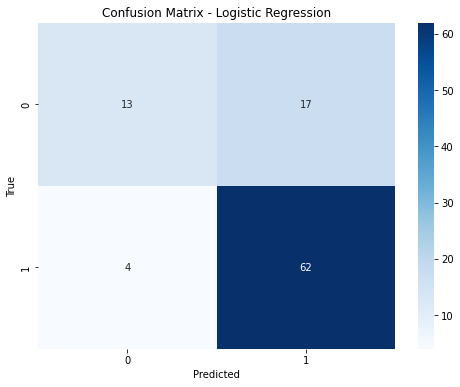

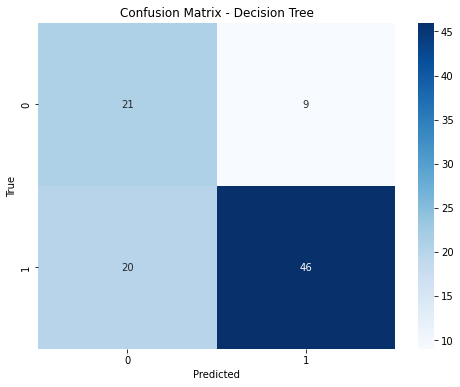

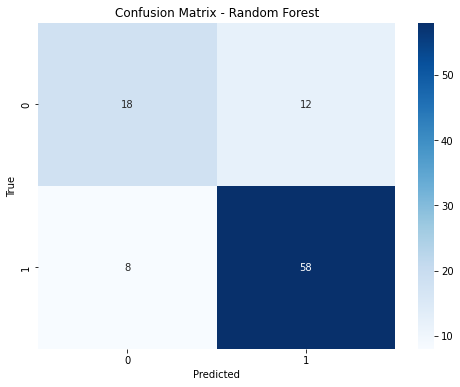

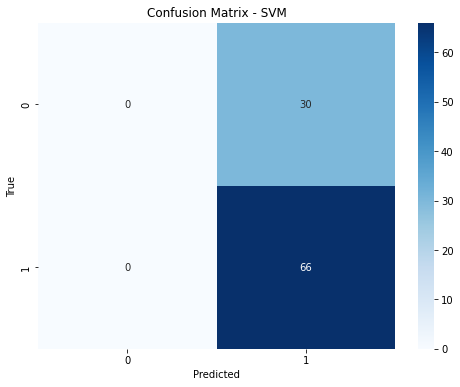

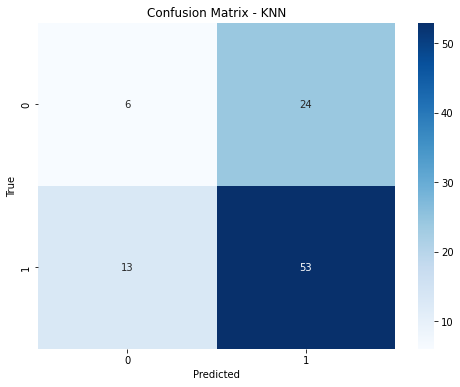

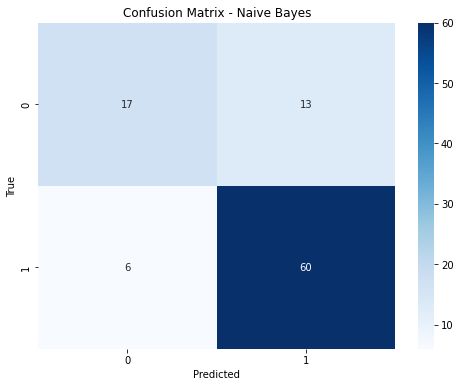

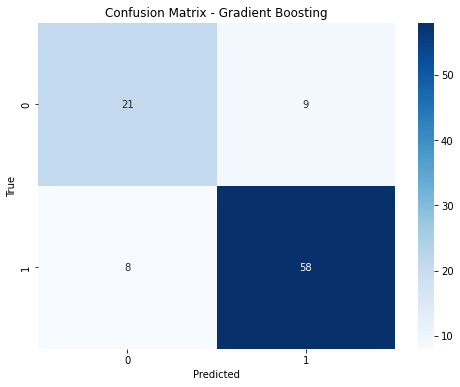

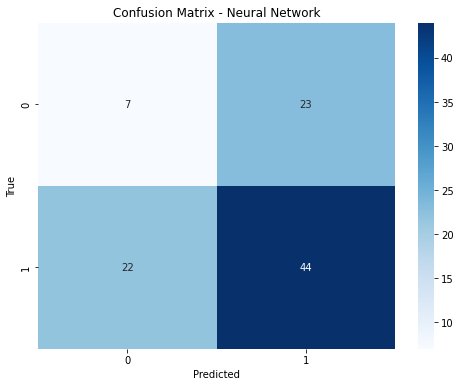

 Logistic Regression:
  - Accuracy: 0.78125
  - F1 Score: 0.7608033749082906
 Decision Tree:
  - Accuracy: 0.6979166666666666
  - F1 Score: 0.7075864276568503
 Random Forest:
  - Accuracy: 0.7916666666666666
  - F1 Score: 0.7872899159663866
 SVM:
  - Accuracy: 0.6875
  - F1 Score: 0.5601851851851851
 KNN:
  - Accuracy: 0.6145833333333334
  - F1 Score: 0.5861459968602825
 Naive Bayes:
  - Accuracy: 0.8020833333333334
  - F1 Score: 0.7939968779693226
 Gradient Boosting:
  - Accuracy: 0.8229166666666666
  - F1 Score: 0.8220816872690199
 Neural Network:
  - Accuracy: 0.53125
  - F1 Score: 0.5290397604179942


{'Logistic Regression': {'Accuracy': 0.78125, 'F1 Score': 0.7608033749082906},
 'Decision Tree': {'Accuracy': 0.6979166666666666,
  'F1 Score': 0.7075864276568503},
 'Random Forest': {'Accuracy': 0.7916666666666666,
  'F1 Score': 0.7872899159663866},
 'SVM': {'Accuracy': 0.6875, 'F1 Score': 0.5601851851851851},
 'KNN': {'Accuracy': 0.6145833333333334, 'F1 Score': 0.5861459968602825},
 'Naive Bayes': {'Accuracy': 0.8020833333333334,
  'F1 Score': 0.7939968779693226},
 'Gradient Boosting': {'Accuracy': 0.8229166666666666,
  'F1 Score': 0.8220816872690199},
 'Neural Network': {'Accuracy': 0.53125, 'F1 Score': 0.5290397604179942}}

In [22]:
predict_with_classifiers(X_train, y_train, X_test, y_test)